In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
X, y = make_blobs(n_samples=500, n_features=5, centers=4, random_state=0)

In [3]:
X = X + np.random.randn(500, 5) * 0.5


In [4]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


KMeans(n_clusters=4)

In [5]:
labels = kmeans.predict(X)


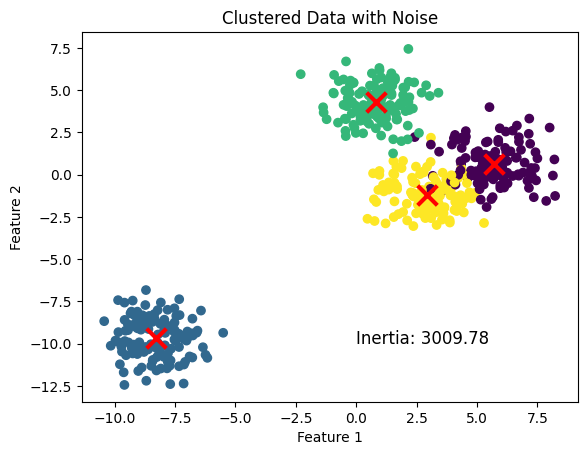

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Clustered Data with Noise")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
inertia = kmeans.inertia_
plt.text(0, -10, "Inertia: {:.2f}".format(inertia), fontsize=12)
plt.show()


In [7]:
unique, counts = np.unique(labels, return_counts=True)
for i in range(len(unique)):
    print("Cluster {}: {} samples".format(unique[i], counts[i]))


Cluster 0: 125 samples
Cluster 1: 125 samples
Cluster 2: 125 samples
Cluster 3: 125 samples


Using dataset


In [10]:
import pandas as pd
iris = pd.read_csv("iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [27]:
wcss = []

x = iris.iloc[:, :-1]
for i in range(1, 11):
	kmeans = KMeans(n_clusters=i,
					init='k-means++',
					max_iter=300,
					n_init=10,
					random_state=0)
	kmeans.fit(x)
	wcss.append(kmeans.inertia_)
	
# from above array with help of elbow method
#we can get no of cluster to provide.
kmeans = KMeans(n_clusters=3,
				init='k-means++',
				max_iter=300,
				n_init=10,
				random_state=0)
y_kmeans = kmeans.fit_predict(x)


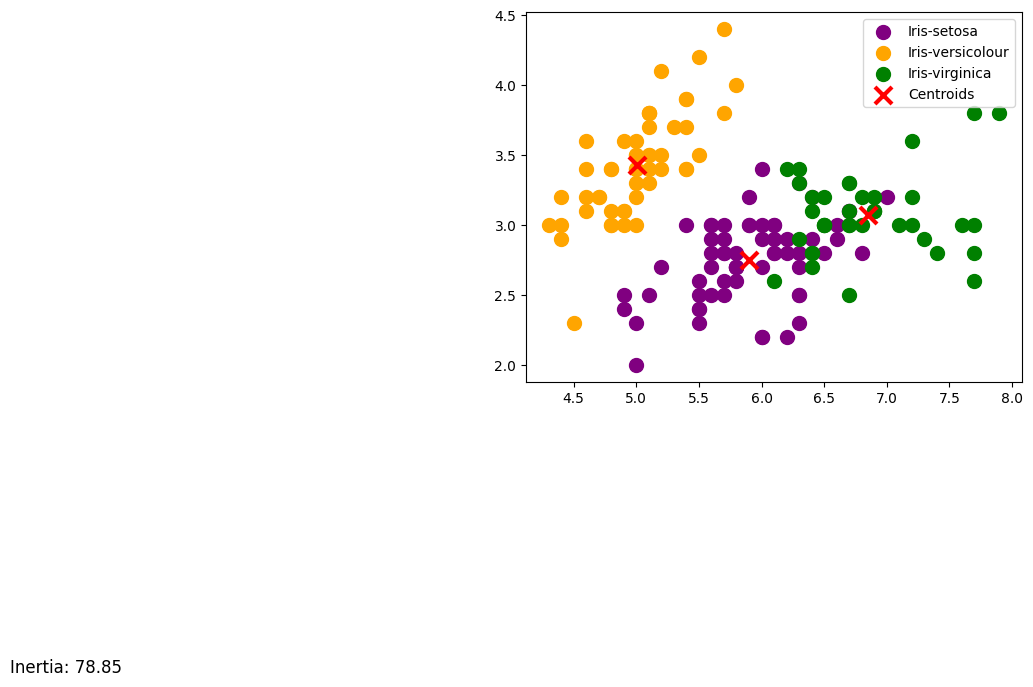

In [30]:
# Visualising the clusters
cols = iris.columns
inertia = kmeans.inertia_
plt.text(0,-0.2, "Inertia: {:.2f}".format(inertia), fontsize=12)
plt.scatter(X.loc[y_kmeans == 0, cols[0]],
			X.loc[y_kmeans == 0, cols[1]],
			s=100, c='purple',
			label='Iris-setosa')
plt.scatter(X.loc[y_kmeans == 1, cols[0]],
			X.loc[y_kmeans == 1, cols[1]],
			s=100, c='orange',
			label='Iris-versicolour')
plt.scatter(X.loc[y_kmeans == 2, cols[0]],
			X.loc[y_kmeans == 2, cols[1]],
			s=100, c='green',
			label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
			kmeans.cluster_centers_[:, 1],
			marker="x",s=150, c='red',linewidths=3,
			label='Centroids')


plt.legend()
